<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<div class="alert alert-info">
<b>
В нашем распоряжении данные компании "Цифры".
Необходимо подготовить прототип модели машинного обучения. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, будем иметь в виду, что перед нами задача регрессии.
    </div>

## Подготовка данных

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [3]:
RANDOM_STATE = 12345

<div class="alert alert-info">
<b>
Загрузим данные. изучим данные в них, проверим на наличие дубликатов и пропусков, при наличии пропусков примем решение о их замене либо полном удалении.
    </div>

<div class="alert alert-info">
<b>
<br>gold_recovery_train_new.csv — обучающая выборка;   
<br>gold_recovery_test_new.csv — тестовая выборка; 
<br>gold_recovery_full_new.csv — исходные данные

</div>

In [4]:
try:
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv',index_col='date')
    full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv',index_col='date')
except:
    train_data = pd.read_csv('gold_recovery_train_new.csv',index_col='date')
    test_data = pd.read_csv('gold_recovery_test_new.csv',index_col='date')
    full_data = pd.read_csv('gold_recovery_full_new.csv',index_col='date')


In [5]:
datasets = [train_data, test_data, full_data]

In [6]:
for dataset in datasets:
    display(dataset.info())
    

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

None

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

None

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

None

In [7]:
for dataset in datasets:
    display(dataset.head())
    

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<div class="alert alert-info">
<b>

Посмотрим наличие явных дубликатов
    </div>

In [8]:
for dataset in datasets:
    display(dataset.duplicated().sum())

0

0

0

<div class="alert alert-info">
<b>
Явных дубликатов не выявлено
    </div>

<div class="alert alert-info">
<b>
<br> Проверим, что эффективность обогащения рассчитана правильно.
<br>Нам известно, что эффективность обогащения рассчитывается по формуле Recovery = ((C*(F-T))/(F*(C-T))) * 100%
<br>где С -  доля золота (продукт) в концентрате после флотации/очистки;
<br>F - доля золота в сырье/концентрате до флотации/очистки;
<br>T - доля золота в отвальных хвостах после флотации/очистки.
<br>Вычислим ее на обучающей выборке (train) для признака rougher.output.recovery
<br>Для рассчетов нам нужен этап флотации (после него состав руды снова изменится снова)
<br>этап флтации обозначается rougher
<br>параметр продукта - output, значит 
<br>С = rougher.output.concentrate_au 
<br>F = rougher.input.feed_au
<br>T =  rougher.output.tail_au
    </div>

In [9]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

In [10]:
recovery = ((C*(F-T))/(F*(C-T))) * 100

<div class="alert alert-info">
<b>
Найдем МАЕ между нашими рассчетами и значением признака rougher.output.recovery
    </div>

In [11]:
mae = mean_absolute_error(train_data['rougher.output.recovery'],recovery)
mae

9.73512347450521e-15

<div class="alert alert-info">
<b>
Видим, что значение МАЕ крайне мало, а это значит, что наши предсказания почти не отличаются от реальных значений
    </div>

<div class="alert alert-info">
<b>
Проанализируем признаки, недоступные в тестовой выборке.
    </div>

In [12]:
not_signs = set(train_data.columns) - set(test_data.columns)
not_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-info">
<b>
В тестовой выборке отсутствуют такие признаки как final.output, primary_cleaner.output, rougher.calculation, rougher.output, secondary_cleaner.
<br>final.output - финальные характеристики продукта
<br>primary_cleaner.output - первичная очистка продукта
<br>rougher.calculation - рассчетные характеристики на этапе флотации
<br>rougher.output - параметры продукта на этапе флотации
<br>secondary_cleaner - этап вторичной очистки
<br>Видим, что эти данные мы получаем в процессе флотации и после нее, значит это онлайн метрики. Остальные признаки известны - значит это офлайн метрики

<div class="alert alert-info">
<b>
Добавим целевые признаки в таблицу с тестовыми значениями из исходных данных. Добовлять будем по колонке 'date'
    </div>

In [13]:
print('Размерность тестовой выборки до добавления целевых признаков:', test_data.shape)
test_data = test_data.merge(full_data[['rougher.output.recovery','final.output.recovery']].loc[test_data.index], on='date', how='left')
print('Размерность тестовой выборки после добавления целевых признаков:', test_data.shape)

Размерность тестовой выборки до добавления целевых признаков: (5290, 52)
Размерность тестовой выборки после добавления целевых признаков: (5290, 54)


<div class="alert alert-info">
<b>
Удалим в обучающей и тестовой выборке строки с пропусками в целевых признаках
    </div>

In [14]:
train_data = train_data.dropna(subset = ['rougher.output.recovery','final.output.recovery'])
test_data = test_data.dropna(subset = ['rougher.output.recovery','final.output.recovery'])

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

<div class="alert alert-info">
<b>
Заполним пропуски соседними значениями
    </div>

In [16]:
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())

0
0


<div class="alert alert-info">
<b>
Промежуточный вывод - загрузив данные в разные дата-фреймы посмотрели на количество пропущенных значений - заполнили их соседними по времени значениями, проверили точность расчета эффективности обогащения,проверили наличие явных дубликатов, выявили недостающие признакми в тестовой выборке.
Перейдем к анализу данных.
    </div>

## Анализ данных



<div class="alert alert-info">
<b>
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различтных этапах очистки.
    </div>

<div class="alert alert-info">
<b>
Согласно технологическому процессу можем выделить следующие этапы - 
<br>1) Приход исходного сырья
<br>2) флотация (обогащение)
<br>3) первичная очистка
<br>4) вторичная очистка
<br>5) финальный концентрат
    </div>

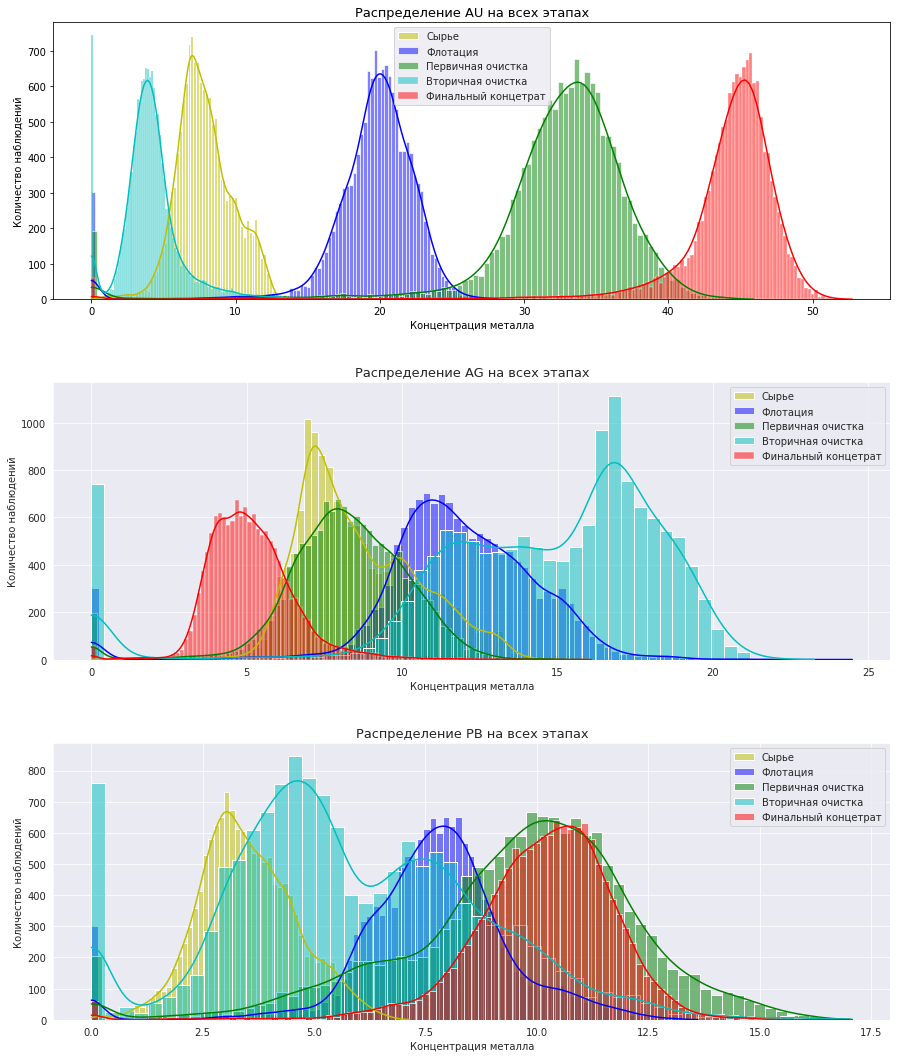

In [17]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
for met in ['au', 'ag', 'pb']:
    position +=1
    plt.subplot(3,1,position)
    plt.title(f'Распределение {str(met).upper()} на всех этапах', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(train_data[f'rougher.input.feed_{met}'], color='y', label='Сырье', kde=True)
    sns.histplot(train_data[f'rougher.output.concentrate_{met}'], color='b', label='Флотация', kde=True)
    sns.histplot(train_data[f'primary_cleaner.output.concentrate_{met}'], color='g', label='Первичная очистка', kde=True)
    sns.histplot(train_data[f'secondary_cleaner.output.tail_{met}'], color='c', label='Вторичная очистка', kde=True)
    sns.histplot(train_data[f'final.output.concentrate_{met}'], color='r', label='Финальный концетрат',kde=True)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

<div class="alert alert-info">
<b>
По графикам видим, что все данные имеют нормальное распределение.
Коцентрация золота на всех этапах сильно не меняется, тогда как концентрация серебра и свинца уменьшается - что логично, ведь цель технологического процесса - получить как можно больше чистого золота.
    </div>

<div class="alert alert-info">
<b>
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках
    </div>

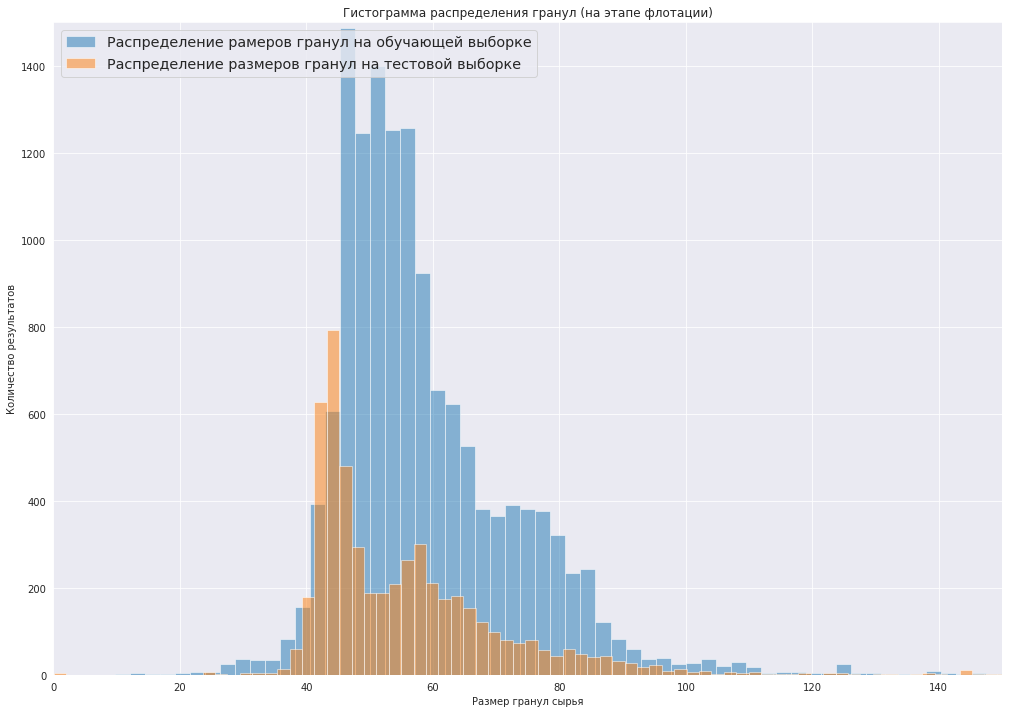

In [18]:
plt.figure(figsize=[17,12])

plt.hist(train_data['rougher.input.feed_size'], bins=200, label = 'Распределение рамеров гранул на обучающей выборке', alpha=.5)
plt.hist(test_data['rougher.input.feed_size'], bins=200, label = 'Распределение размеров гранул на тестовой выборке', alpha=.5)

plt.xlim([0, 150])
plt.ylim([0, 1500])

plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения гранул (на этапе флотации)')
plt.show()

<div class="alert alert-info">
<b>
Видим, что основная доля всех гранул находятся в диапазоне от 40ед. до 60ед., значит, будем считать, что оценка модели будет правильной.
    </div>

<div class="alert alert-info">
<b>
V2. Построим графики kde
    </div>

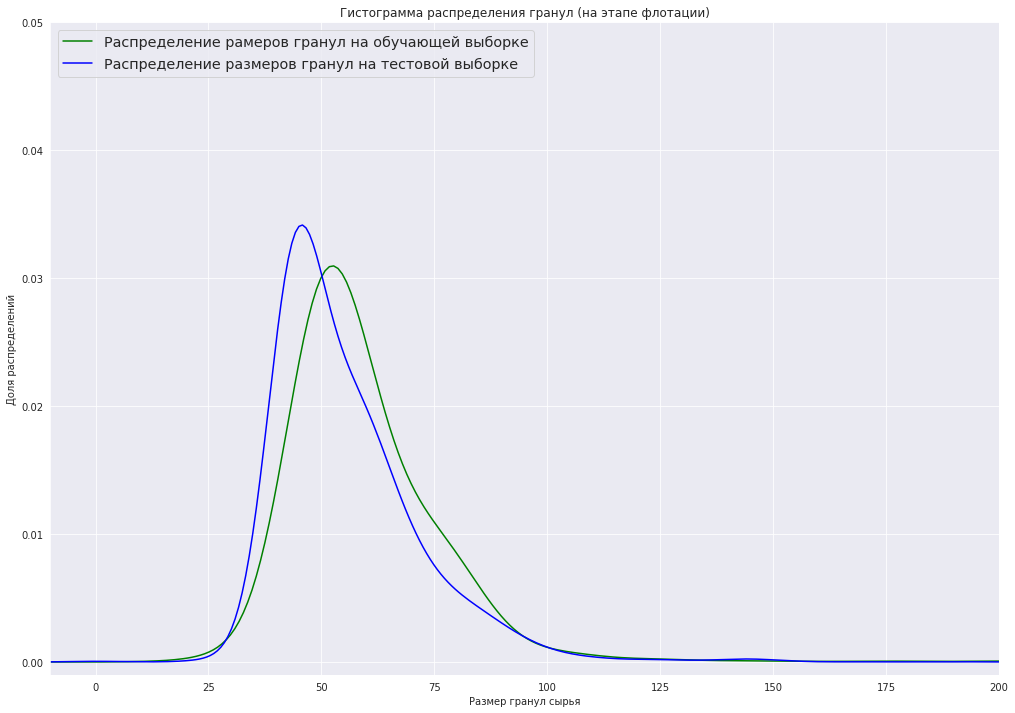

In [19]:
plt.figure(figsize=[17,12])
ax = train_data['rougher.input.feed_size']
bx = test_data['rougher.input.feed_size']
s=ax.plot.kde(bw_method=0.3, label = 'Распределение рамеров гранул на обучающей выборке',color='green')
t=bx.plot.kde(bw_method=0.3, label ='Распределение размеров гранул на тестовой выборке', color = 'blue')


plt.xlim([-10, 200])
plt.ylim([-0.001, 0.05])

plt.xlabel('Размер гранул сырья')
plt.ylabel('Доля распределений')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения гранул (на этапе флотации)')
plt.show()

Благодаря графику оценки плотности, видим, что распределение гранул на тестовой и обучающей выборках практически совпадает.

<div class="alert alert-info">
<b>
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах на тренировочной выборке
    </div>

In [20]:
rougher_train = (train_data['rougher.output.concentrate_au'] + 
                           train_data['rougher.output.concentrate_ag'] + 
                           train_data['rougher.output.concentrate_pb'] +
                           train_data['rougher.output.concentrate_sol'])
primary_train = (train_data['primary_cleaner.output.concentrate_au'] + 
                           train_data['primary_cleaner.output.concentrate_ag'] + 
                           train_data['primary_cleaner.output.concentrate_pb'] +
                           train_data['primary_cleaner.output.concentrate_sol'])

final_train = (train_data['final.output.concentrate_au'] + 
                         train_data['final.output.concentrate_ag'] + 
                         train_data['final.output.concentrate_pb'] +
                         train_data['final.output.concentrate_sol'])

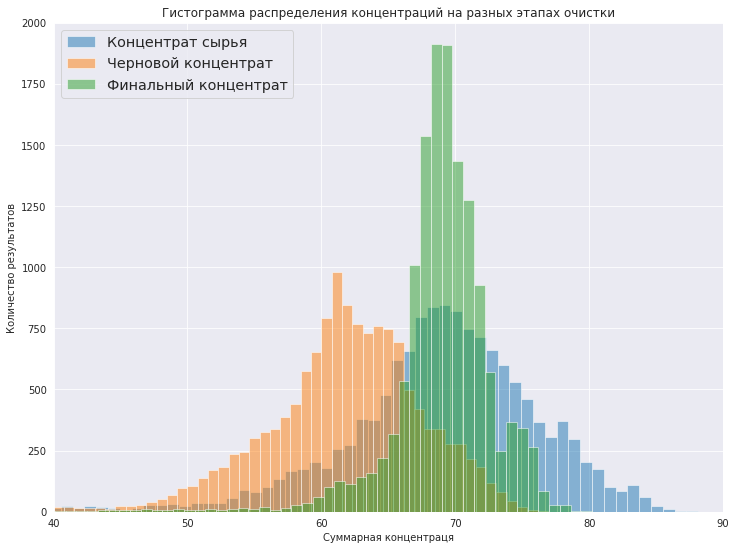

In [21]:
plt.figure(figsize=[12,9])

plt.hist(rougher_train, bins=100, label = 'Концентрат сырья', alpha=.5)
plt.hist(primary_train, bins=100, label = 'Черновой концентрат', alpha=.5)
plt.hist(final_train, bins=100, label = 'Финальный концентрат', alpha=.5)

plt.xlim([40, 90])
plt.ylim([0, 2000])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

<div class="alert alert-info">
<b>
видим, что концентрация всех веществ на финальном этапе более чем в 2 раза выше по сравнению с изначальным сырьем, а диапазон разброса суммарной концентрации веществ - уже.
также по графику видим нормальное распределения, и значения суммы до 0 будем считать выбрасами. Данные значения могут сильно изменить поведение наших будущих моделей, поэтому удалим их.
    </div>

<div class="alert alert-info">
<b> V2. Добавляю график суммарной концентрации по исходному сырью  для тестовой и тренеровочной выборок. сравним их концентрацию
    </div>

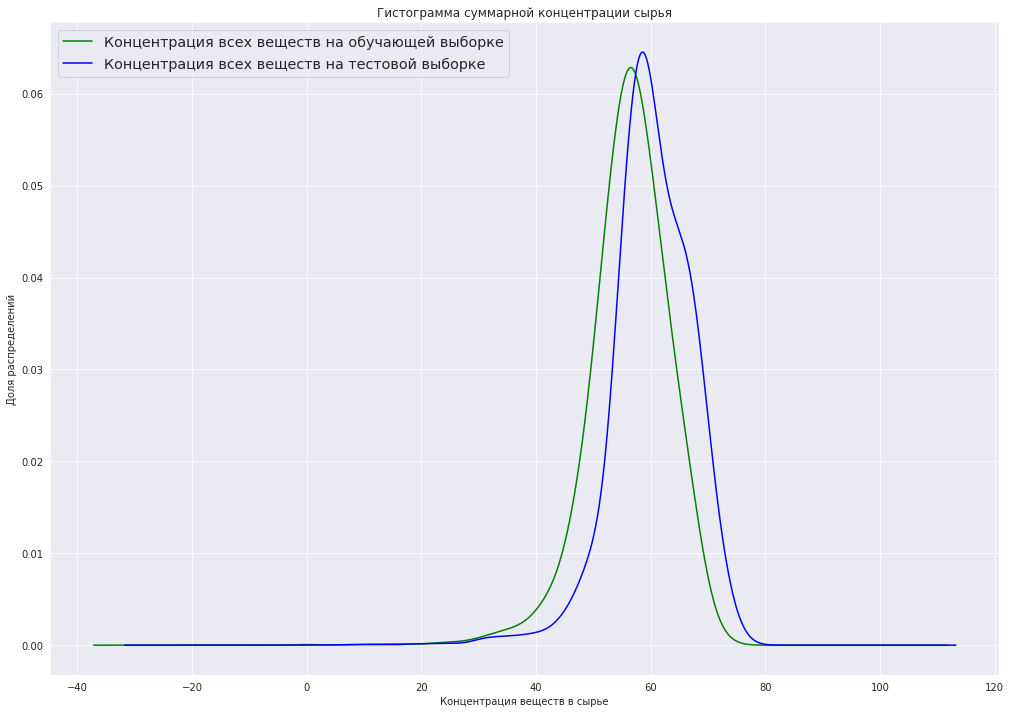

In [22]:
#v2
feed_train = train_data[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']].sum(axis=1)
feed_test = test_data[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']].sum(axis=1)
plt.figure(figsize=[17,12])
ax = feed_train
bx = feed_test
s=ax.plot.kde(bw_method=0.3, label = 'Концентрация всех веществ на обучающей выборке',color='green')
t=bx.plot.kde(bw_method=0.3, label ='Концентрация всех веществ на тестовой выборке', color = 'blue')


#plt.xlim([0, 200])
#plt.ylim([-0.001, 0.05])

plt.xlabel('Концентрация веществ в сырье')
plt.ylabel('Доля распределений')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма суммарной концентрации сырья')
plt.show()

<div class="alert alert-info">
<b>
    V2. По данным графикам видим, что плотность веществ в сырье в тестовой выборке практически не отличается от плотности вещество в сырье в тестовой выборке.
    </div>

In [23]:
train_data = train_data[(train_data['rougher.output.concentrate_au'] > 0) & (train_data['rougher.output.concentrate_ag'] > 0) & (train_data['rougher.output.concentrate_pb'] > 0) & (train_data['rougher.output.concentrate_sol'] > 0)]
train_data = train_data[(train_data['final.output.concentrate_au'] > 0) & (train_data['final.output.concentrate_ag'] > 0) & (train_data['final.output.concentrate_pb'] > 0) & (train_data['final.output.concentrate_sol'] > 0)]
full_data = full_data[(full_data['rougher.output.concentrate_au'] > 0) & (full_data['rougher.output.concentrate_ag'] > 0) & (full_data['rougher.output.concentrate_pb'] > 0) & (full_data['rougher.output.concentrate_sol'] > 0)]
full_data= full_data[(full_data['final.output.concentrate_au'] > 0) & (full_data['final.output.concentrate_ag'] > 0) & (full_data['final.output.concentrate_pb'] > 0) & (full_data['final.output.concentrate_sol'] > 0)]


<div class="alert alert-info">
<b>
    Удалим из тренеровочных данных признаки, которые отсутствуют в тестовых данных
    </div>

In [24]:
not_signs = set(train_data.columns) - set(test_data.columns)
not_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

In [25]:
train_data = train_data.drop(not_signs, axis='columns')
train_data

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,73.755150,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,69.049291,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,67.002189,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


## Модель

<div class="alert alert-info">
<b>
по условиям задачи, нам нужно спрогнозировать 2 величины:
<br>1. эффективность обогащения чернового концентрата rougher.output.recovery
<br>2. эффективность обогащения финального концентрата final.output.recovery
<br>Значит это будут наши целевые признаки
    </div>

<div class="alert alert-info">
<b>
Напишим функцию вычисления sMAPE
    </div>

In [27]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_rougher, target_predictions_rougher)

<div class="alert alert-info">
<b>
В качестве оценки в кросс-валидации установим значение функции sMAPE
    </div>

In [28]:
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

<div class="alert alert-info">
<b>
Выделим признаки
    </div>

In [29]:
features_train = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis='columns')
target_train = train_data[['rougher.output.recovery','final.output.recovery']]
features_test = test_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test = test_data[['rougher.output.recovery','final.output.recovery']]

<div class="alert alert-info">
<b>
Приступим к обучению моделей на тренировочных данных
    </div>

In [30]:
#Линейная регрессия
model=LinearRegression()
model.fit(features_train,target_train)
smape = cross_val_score(model,features_train,target_train, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для дерева решений:',smape*(-1))


Лучшее значение sMAPE для дерева решений: 7.272530148921706


In [36]:
#Дерево решений
param_grid = {'max_depth': range(2, 11), 'min_samples_split': [2,3,4]}

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_,  search.best_params_))

Лучшее значение sMAPE для дерева решений: 7.242562461094463 при значениях гиперпараметров: {'max_depth': 2, 'min_samples_split': 2}


In [37]:
#Случайный лес
param_grid = {'n_estimators': range(10, 31, 10), 'max_depth': range(1,5)}

model = RandomForestRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 6.706619297522074 при значениях гиперпараметров: {'max_depth': 4, 'n_estimators': 20}


<div class="alert alert-info">
<b>
V2.Видим, что минимальное значение sMAPE у модели случайного леса, с гиперпараетрами - max_depth=4, n_estimators=20.
Проверим эту модель на тестовой выборке
    </div>

<div class="alert alert-info">
<b>
   V2. Добавила в набор для дерева и леса еще гиперпараметры и перебрала их гридсерчем
    </div>

In [38]:
model = RandomForestRegressor(max_depth=4, n_estimators=20, random_state=RANDOM_STATE) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

sMAPE для тестовых данных: 8.533806497482086


<div class="alert alert-info">
<b>
V.2 Произведем преверку на адекватность нашей модели, сравнив sMAPE для Dummy модели на тренировочных данных и на тестовых. если значение нашей модели будет лучше - значит модель работает адекватно.
</div>

In [44]:
dummy_rougher = DummyRegressor(strategy='mean')
dummy_rougher.fit(features_train, target_train)
dummy_rougher_predict = dummy_rougher.predict(features_train)
smape_dummy = calculate_final_smape(target_train, dummy_rougher_predict)
print('sMAPE Dummy на тренировочных данных:', smape_dummy)

sMAPE Dummy на тренировочных данных: 7.347410661910845


In [41]:
dummy_rougher = DummyRegressor(strategy='mean')
dummy_rougher.fit(features_train, target_train)
dummy_rougher_predict = dummy_rougher.predict(features_test)
smape_dummy = calculate_final_smape(target_test,dummy_rougher_predict)
print('sMAPE Dummy на тестовых данных:', smape_dummy)

sMAPE Dummy на тестовых данных: 9.066150363733703


<div class="alert alert-info">
<b>
   v2. Видим, что значение sMAPE у Dummy модели на тренировочных данных и на тестовых данных выше, чем значение у модели случайный лес, с гиперпараметрами  max_depth=4, n_estimators=20.
    </div>

<div class="alert alert-info">
<b>
Вывод:
<br>в нашем распоряжении были данные компании "Цифры".
<br>Необходимо было подготовить прототип модели машинного обучения. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, для этого мы:
<br>-загрузили данные
<br>-проверили рассчет значения эффективности обогащения
<br>-проанализировали признаки, не доступные в тестовой выборке
<br>-проследили изменение концентрации металлов на различных этапах процесса
<br>-сравнили распределение гранул на тренировочной и тестовой выборках
<br>-исследовали суммарную концентрацию всех веществ на разных этапах
<br>-построили модели
<br>-оценуку моделей провели с помощью кросс-валидации по формуле sMAPE
<br>-протестировали лучшую модель на тестовой выборке
<br>По итогу нашей работы, лучшая модель оказалась модель случайного леса, с гипермпараметрами - max_depth=4, n_estimators=20. Данную модель рекомендуем к использованию компании "Цифры"
    </div>

## Чек-лист готовности проекта